## Introduction

In this guide, we'll explore Firecrawl's `/map` endpoint - a powerful tool for automated website mapping and URL discovery. We'll cover what it does, why it matters, and how to use it effectively in your web development workflow.

Website mapping has become increasingly critical in modern web development. As sites grow more complex with dynamic content and single-page applications, having a clear understanding of your site's structure and URL hierarchy is essential for SEO, maintenance, and user experience.

The /map endpoint helps solve common challenges like keeping track of site structure, identifying broken links, and ensuring search engines can properly crawl and index your content. Let's dive into how it works.

## What Does Firecrawl's `/map` Endpoint Do?

To understand what the `/map` endpoint does, let's briefly cover what's __site mapping__ and why it is important.

### The importance of site mapping


Put simply, a sitemap is a list or a diagram that communicates the structure of web pages in a website. It is useful for a number of reasons.

First, it helps developers and site owners understand and maintain their website's structure. Having a clear overview of how pages are connected makes it easier to manage content, identify navigation issues, and ensure a logical flow for users.

Second, sitemaps are crucial for SEO. Search engines use sitemaps to discover and index pages more efficiently. A well-structured sitemap helps ensure all your important content gets crawled and indexed properly.

Third, sitemaps can help identify potential issues like broken links, orphaned pages (pages with no incoming links), or circular references. This makes troubleshooting and maintenance much more manageable.

Finally, sitemaps are valuable for planning site improvements and expansions. They provide a bird's-eye view that helps in making strategic decisions about content organization and information architecture.

### Types of sitemaps and where they are used

There are two main types of sitemaps: visual and XML.

Visual sitemaps are diagrams or flowcharts that show how websites are structured at-a-glance. They typically use boxes, lines, and other visual elements to represent pages and their relationships. These visual representations make it easy for stakeholders, designers, and developers to quickly understand site hierarchy, navigation paths, and content organization. They're particularly useful during the planning and design phases of web development, as well as for communicating site structure to non-technical team members. 

![](https://cdn.prod.website-files.com/649ae86ac1a4be707b656519/65a84b0bfe7e308f557dce75_Generate%20a%20sitemap%20online.webp)

Source: [Flowapp](https://www.flowmapp.com/features/generate-sitemap-online)

XML sitemaps are shown to the public much less frequently because they contain structured XML code that can look intimidating to non-technical users. But an XML sitemap is just an organized file containing all the URLs of a website that is readable to search engines. It includes important metadata about each URL like when it was last modified, how often it changes, and its relative importance. Search engines like Google use this information to crawl websites more intelligently and ensure all important pages are indexed. While XML sitemaps aren't meant for human consumption, they play a vital role in SEO and are often required for large websites to achieve optimal search engine visibility. 

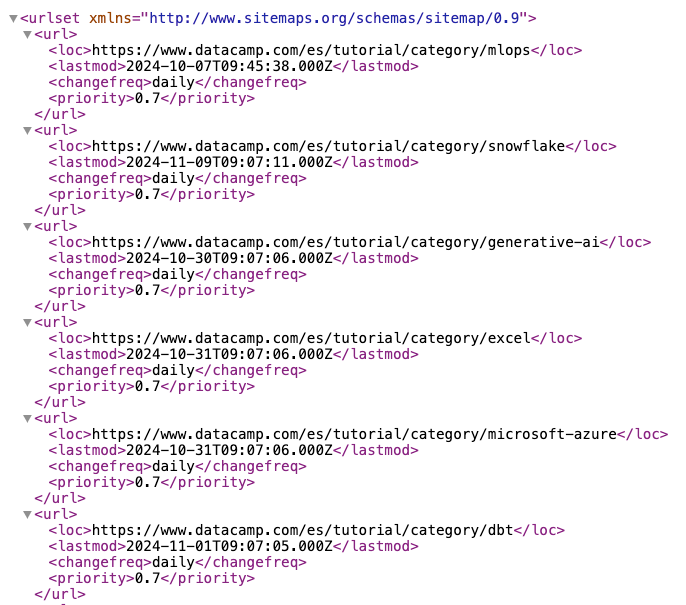

Source: [DataCamp](https://www.datacamp.com/sitemap/es/tutorial/category.xml)

### How the `/map` endpoint solves site mapping challenges

When you are building a website from scratch, you usually need a visual sitemap and can develop the XML one over the time as you add more pages. However, if you neglected these steps early on and suddenly find yourself with a massive website, possibly with thousands of URLs, creating either type of sitemap manually becomes an overwhelming task. This is where automated solutions like the `/map` endpoint can become invaluable.

The real challenge of mapping existing sites is finding all the URLs that exist on your website. Without automated tools, you'd need to manually click through every link, record every URL, and track which pages link to which others. Traditional web scraping solutions using Python libraries like `beautifulsoup`, `scrapy` or `lxml` can automate this process but they can quickly become useless when dealing with modern web applications that heavily rely on JavaScript for rendering content, use complex authentication systems, or implement rate limiting and bot detection. 

These traditional approaches are not only time-consuming but also error-prone, as it's easy to miss URLs in JavaScript-rendered content, dynamically generated pages, or deeply nested navigation menus.

The `/map` endpoint solves these challenges and provides the fastest and easiest solution to go from a single URL to a map of the entire website. The /map endpoint is particularly useful in scenarios where:

- You want to give end-users control over which links to scrape by presenting them with options
- Rapid discovery of all available links on a website is crucial
- You need to focus on topic-specific content, you can use the search parameter to find relevant pages
- You only want to extract data from particular sections of a website rather than crawling everything

### Limitations of `/map` in the alpha stage

While the /map endpoint is still in alpha stage, it has some limitations. The endpoint prioritizes speed so it may not capture all website links. The vision for this endpoint is to maintain its blazing-fast speed and still capture every single link in a given website. Feedback and suggestions are welcome.

## Getting Started With the `/map` Endpoint

Firecrawl is a scraping engine exposed as a REST API, which means you can use it from the command-line using cURL or by using one of its SDKs in Python, Node, Go or Rust. In this tutorial, we will use its Python SDK, so please install it in your environment:

```bash
$ pip install firecrawl-py
```

The next step is obtaining a Firecrawl API key by signing up at [firecrawl.dev](firecrawl.dev) and choosing a plan (the free plan is fine for this tutorial). 

Once you have your API key, you should save it in a .env file, which provides a secure way to store sensitive credentials without exposing them in your code:

```bash
$ touch .env
$ echo "FIRECRAWL_API_KEY='YOUR-API-KEY'" >> .env
```

Then, you should install python-dotenv to automatically load the variables in `.env` files in Python scripts and notebooks:

```bash
$ pip install python-dotenv
```

Then, using the /map endpoint is as easy as the following code:

In [2]:
from firecrawl import FirecrawlApp
from dotenv import load_dotenv; load_dotenv()

app = FirecrawlApp()

response = app.map_url(url="https://firecrawl.dev")

In this code snippet, we're using the Firecrawl Python SDK to map a URL. Let's break down what's happening:

First, we import two key components:
- FirecrawlApp from the firecrawl package, which provides the main interface to interact with Firecrawl's API
- `load_dotenv` from `dotenv` to load our environment variables containing the API key

After importing, we initialize a FirecrawlApp instance, which automatically picks up our API key from the environment variables.

Finally, we make a request to map the URL "https://firecrawl.dev" using the `map_url()` method. This crawls the website and returns information about its structure and pages, taking about two seconds on my machine (the speed may vary based on internet speeds).

Let's look at the `response` dictionary:

In [4]:
response.keys()

dict_keys(['success', 'links'])

It only has two keys: 'success' and 'links'. The 'success' key indicates whether the request was successful, and the 'links' key contains the URLs found on the website:

In [6]:
len(response['links'])

98

## Further Configuration Options For `/map`


### Searching for specific links

The most notable feature of the endpoint is its `search` parameter. This parameter allows you to filter the URLs returned by the crawler based on specific patterns or criteria. For example, you can use it to only retrieve URLs containing certain keywords or matching specific paths. This makes it incredibly useful for focused crawling tasks where you're only interested in a subset of pages for massive websites.

Let's use this feature on the Stripe documentation and only search for pages related to taxes:

In [17]:
url = "https://docs.stripe.com"

response = app.map_url(url=url, params={"search": "tax"})

The response structure will be the same:

In [13]:
response["links"][:10]

['https://docs.stripe.com/tax',
 'https://docs.stripe.com/tax/how-tax-works',
 'https://docs.stripe.com/tax/reports',
 'https://docs.stripe.com/tax/calculating',
 'https://docs.stripe.com/api/tax_rates',
 'https://docs.stripe.com/tax/tax-codes',
 'https://docs.stripe.com/tax/zero-tax',
 'https://docs.stripe.com/tax/products-prices-tax-codes-tax-behavior',
 'https://docs.stripe.com/payments/checkout/taxes',
 'https://docs.stripe.com/billing/taxes/tax-rates']

Let's count up the found links:

In [18]:
len(response["links"])

2677

More than 2600 in only three seconds!

### More /map parameters

There are some additional parameters /map accepts to control its behavior:

**ignoreSitemap**
- Type: boolean
- Default: true
- Description: When set to true, the crawler will not attempt to parse or use the website's `sitemap.xml` file during crawling. This can be useful when you want to discover pages through navigation links only.

**sitemapOnly**
- Type: boolean 
- Default: false
- Description: When enabled, the crawler will exclusively return URLs found in the website's sitemap files, ignoring any links discovered through page crawling. This is useful for quickly indexing officially published pages.

**includeSubdomains**
- Type: boolean
- Default: false
- Description: Controls whether the crawler should follow and return links to subdomains (e.g., blog.example.com when crawling example.com). Enabling this provides a more comprehensive view of the entire web property.

**limit**
- Type: integer
- Default: 5000
- Description: Specifies the maximum number of URLs the crawler will return in a single request. This helps manage response sizes and processing time. Must be less than 5000 to prevent excessive server load for the time being.
- Required range: x < 5000

Let's try running the Stripe example by including some of these parameters, like the `sitemapOnly` and `includeSubdomains` options set to True:

In [16]:
url = "https://docs.stripe.com"

response = app.map_url(url=url, params={"search": "tax", "sitemapOnly": True, "includeSubdomains": True})
len(response['links'])

2712

This time, the link count increased.

## Firecrawl `/crawl` vs. `/map`

If you read our [separate guide on the `/crawl` endpoint](https://www.firecrawl.dev/blog/mastering-the-crawl-endpoint-in-firecrawl) of Firecrawl, you may notice one similarity between it and the `/map` endpoint:

If you set the response format of crawl to "links", you will also get a list of URLs found on the website. While the purpose is the same, there are huge differences performance-wise.

First, the `/crawl` endpoint is painfully slow for URL discovery, as evidenced by the execution times in the examples below:

In [29]:
%%time

url = "books.toscrape.com"

crawl_response = app.crawl_url(url=url, params={"scrapeOptions": {"formats": ["links"]}})

CPU times: user 843 ms, sys: 470 ms, total: 1.31 s
Wall time: 2min 9s


In [ ]:
# REMOVE THIS BEX
crawl_response = response

In [30]:
%%time

url = "books.toscrape.com"

map_response = app.map_url(url=url)

CPU times: user 4.91 ms, sys: 3.58 ms, total: 8.49 ms
Wall time: 2.04 s


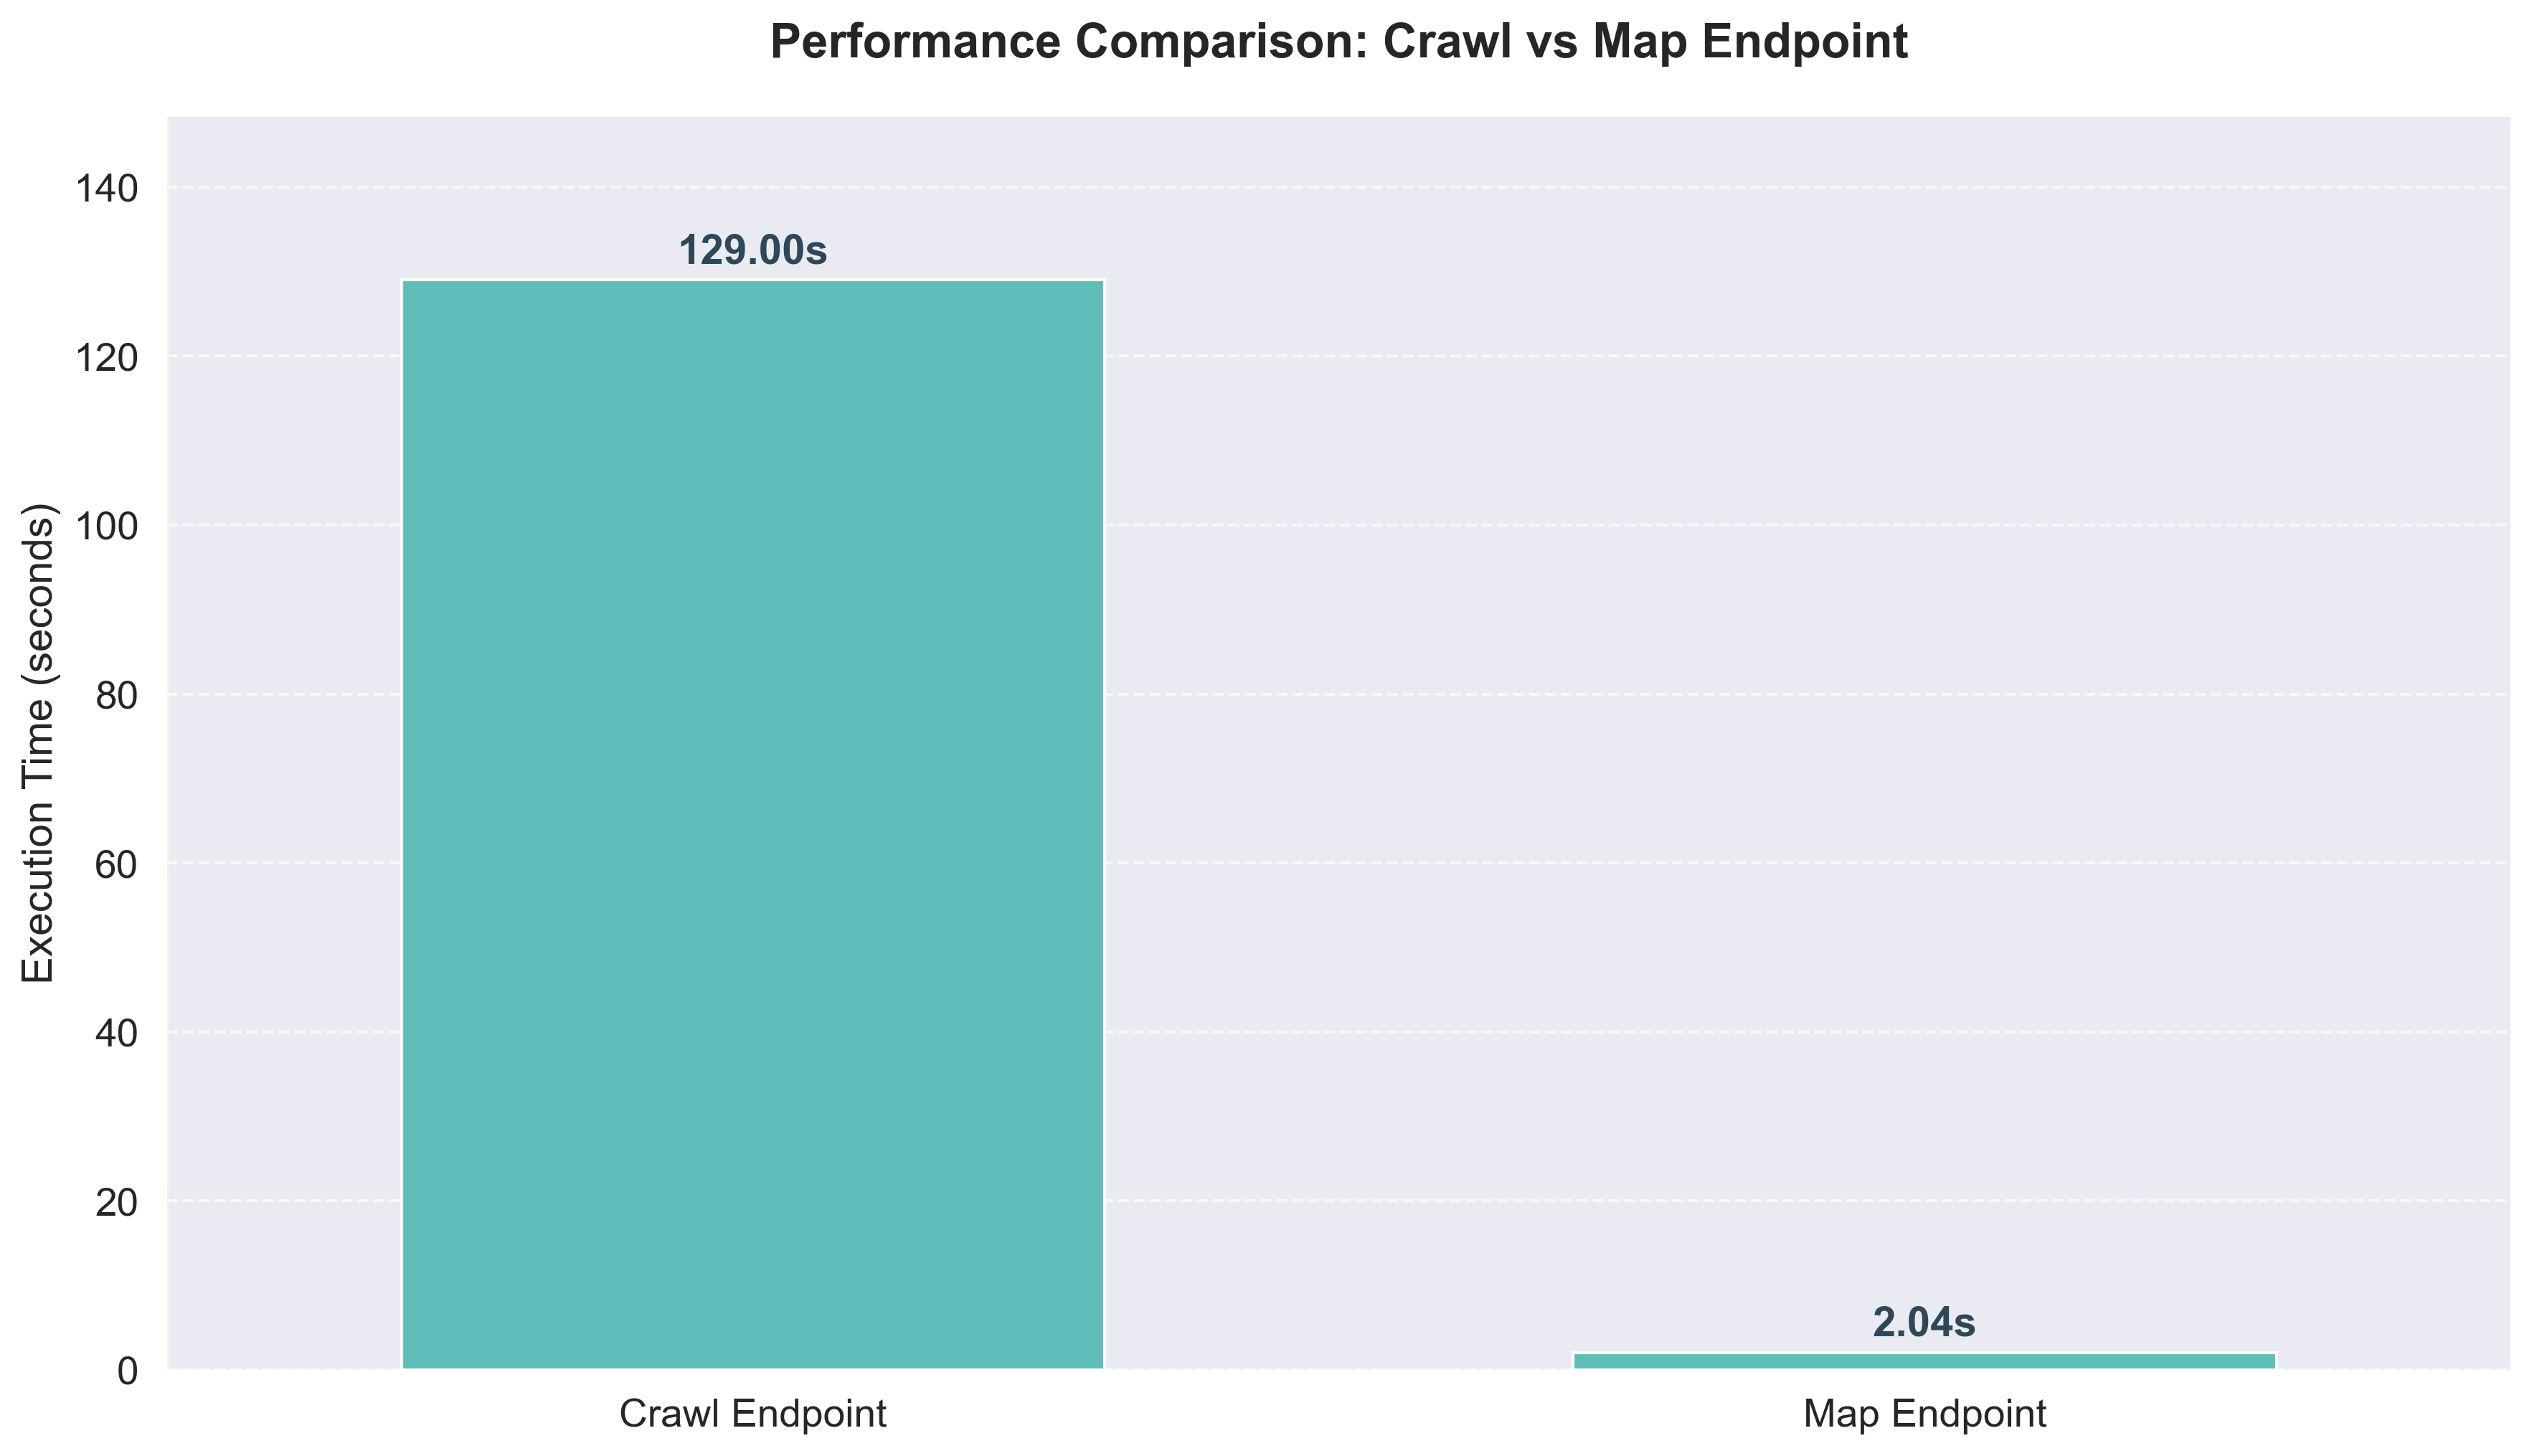

In [31]:
execution_times = [129, 2.04]

import seaborn as sns
import matplotlib.pyplot as plt

# Set style and color palette
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_context("notebook", font_scale=1.2)

# Create figure with high DPI for crisp rendering
plt.figure(figsize=(12, 7), dpi=300)

# Create the bar plot with a single color
ax = sns.barplot(
    x=["Crawl Endpoint", "Map Endpoint"],
    y=execution_times,
    width=0.6,
    color="#4ECDC4",  # Single color for both bars
)

# Customize the plot
plt.title(
    "Performance Comparison: Crawl vs. Map Endpoint",
    pad=20,
    fontsize=16,
    fontweight="bold",
)
plt.ylabel("Execution Time (seconds)", fontsize=14, fontweight="medium")

# Remove x-axis label
plt.xlabel("")

# Customize grid
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Clean up the chart
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_alpha(0.3)
ax.spines["bottom"].set_alpha(0.3)

# Add larger value labels on top of bars
for i, v in enumerate(execution_times):
    ax.text(
        i,
        v + 1,
        f"{v:.2f}s",
        ha="center",
        va="bottom",
        fontsize=14,  # Increased font size
        fontweight="bold",
        color="#2F4858",
    )

# Adjust y-axis to add some padding above bars
plt.ylim(0, max(execution_times) * 1.15)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

This is because `/crawl` needs to fully load and parse each page's HTML content, even when we only want the links. In contrast, `/map` is optimized specifically for URL discovery, making it much faster for generating sitemaps and link analysis. 

But, since `/map` is alpha, it doesn't capture as many links as `/crawl`:

In [39]:
crawl_links = set()

for page in crawl_response['data']:
    crawl_links.update(page["links"])

len(crawl_links)

1216

In [40]:
len(map_response["links"])

298

In fact, `/map` found three times less links than `/crawl`.

However, due to its speed, `/map` can still provide a good foundation for sitemap generation and its accuracy will increase as it progresses towards being stable. 

## Creating an XML Sitemap Using `/map`

Now, let's see how to convert the links found with `/map` to an XML sitemap in Python. We will need to import the following packages:

In [43]:
from datetime import datetime
import xml.etree.ElementTree as ET
from urllib.parse import urlparse

We'll use:
 - `datetime`: To add timestamps to our sitemap entries
 - `xml.etree.ElementTree`: To create and structure the XML sitemap file
 - `urllib.parse`: To parse and validate URLs before adding them to the sitemap

Let's start by defining a new function - `create_xml_sitemap`:

```python
def create_xml_sitemap(urls, base_url):
    # Create the root element
    urlset = ET.Element("urlset")
    urlset.set("xmlns", "http://www.sitemaps.org/schemas/sitemap/0.9")
```

In the body of the function, we first create the root XML element named "urlset" using `ET.Element()`. Then we set its `xmlns` attribute to the sitemap schema URL "http://www.sitemaps.org/schemas/sitemap/0.9" to identify this as a valid sitemap XML document.

Then, we get the current date for providing a last modified date (since `/map` doesn't return the modified dates of pages):

```python
def create_xml_sitemap(urls, base_url):
    # Create the root element
    ...

    # Get current date for lastmod
    today = datetime.now().strftime("%Y-%m-%d")
```

Then, we add each URL to the sitemap:

```python
def create_xml_sitemap(urls, base_url):
    ...

    # Add each URL to the sitemap
    for url in urls:
        # Only include URLs from the same domain
        if urlparse(url).netloc == urlparse(base_url).netloc:
            url_element = ET.SubElement(urlset, "url")
            loc = ET.SubElement(url_element, "loc")
            loc.text = url

            # Add optional elements
            lastmod = ET.SubElement(url_element, "lastmod")
            lastmod.text = today

            changefreq = ET.SubElement(url_element, "changefreq")
            changefreq.text = "monthly"

            priority = ET.SubElement(url_element, "priority")
            priority.text = "0.5"
```

The loop iterates through each URL in the provided list and adds it to the sitemap XML structure. For each URL, it first checks if the domain matches the base URL's domain to ensure we only include URLs from the same website. If it matches, it creates a new `<url>` element and adds several child elements:

- `<loc>`: Contains the actual URL
- `<lastmod>`: Set to today's date to indicate when the page was last modified
- `<changefreq>`: Set to "monthly" to suggest how often the page content changes
- `<priority>`: Set to "0.5" to indicate the relative importance of the page

This creates a properly formatted sitemap entry for each URL following the Sitemap XML protocol specifications.

After the loop finishes, we create and return the XML string:

```python
def create_xml_sitemap(urls, base_url):
    ...

    # Add each URL to the sitemap
    for url in urls:
        ...

    # Create the XML string
    return ET.tostring(urlset, encoding="unicode", method="xml")
```

Here is the full function:

In [45]:
def create_xml_sitemap(urls, base_url):
    # Create the root element
    urlset = ET.Element("urlset")
    urlset.set("xmlns", "http://www.sitemaps.org/schemas/sitemap/0.9")

    # Get current date for lastmod
    today = datetime.now().strftime("%Y-%m-%d")

    # Add each URL to the sitemap
    for url in urls:
        # Only include URLs from the same domain
        if urlparse(url).netloc == urlparse(base_url).netloc:
            url_element = ET.SubElement(urlset, "url")
            loc = ET.SubElement(url_element, "loc")
            loc.text = url

            # Add optional elements
            lastmod = ET.SubElement(url_element, "lastmod")
            lastmod.text = today

            changefreq = ET.SubElement(url_element, "changefreq")
            changefreq.text = "monthly"

            priority = ET.SubElement(url_element, "priority")
            priority.text = "0.5"

    # Create the XML string
    return ET.tostring(urlset, encoding="unicode", method="xml")

Let's use the function on the links returned by the last `/map` endpoint use:

In [46]:
base_url = "https://books.toscrape.com"
links = map_response["links"]

xml_sitemap = create_xml_sitemap(links, base_url)

# Save to file
with open("sitemap.xml", "w", encoding="utf-8") as f:
    f.write('<?xml version="1.0" encoding="UTF-8"?>\n')
    f.write(xml_sitemap)

Here is what the file looks like after saving:

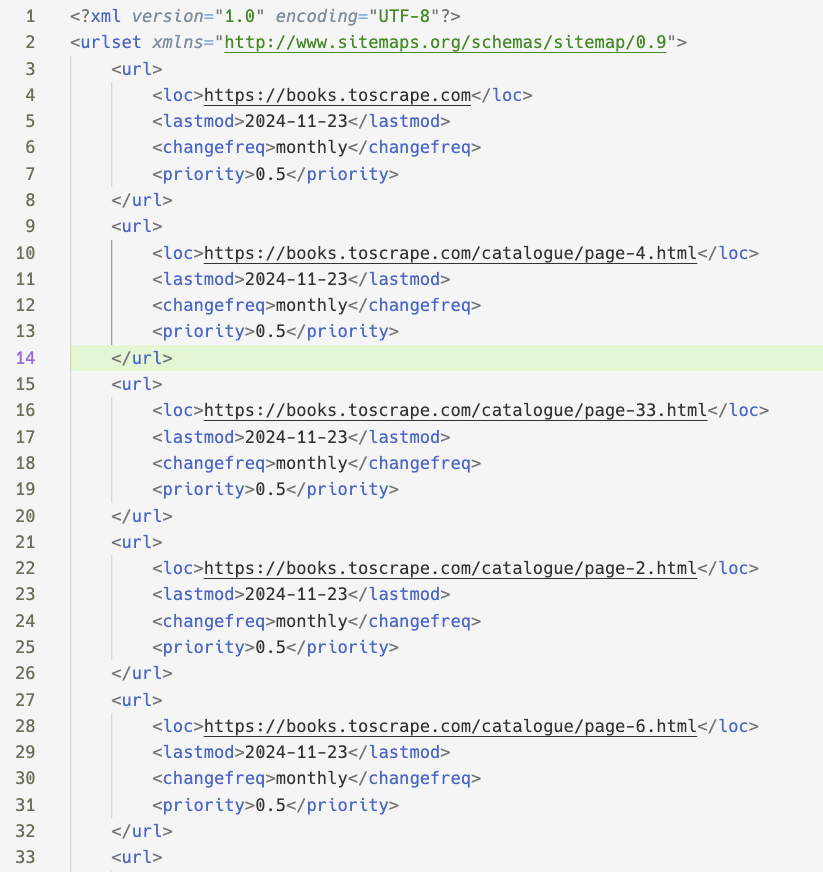

Such `sitemap.xml` file provides a standardized way for search engines to discover and crawl all pages on your website.

## Creating a Visual Sitemap of a Website with `/map`

If you want a visual sitemap of a website, you don't have to sign up for expensive third-party services and platforms. You can automatically generate one using the `/map` endpoint, Plotly and a few other libraries. 

The resulting graph would like the following:

![](images/stripe_docs.png)

The Sankey diagram above visualizes the hierarchical structure of [the Stripe documentation](docs.stripe.org) (which is quite large) by showing how pages are organized and connected across different sections. The width of each flow represents the number of pages in that section, making it easy to identify which parts of the website contain the most content. The colors help distinguish between different sections and their subsections.

The diagram starts from a central root node and branches out into main sections of the website. Each section can then split further into subsections, creating a tree-like visualization of the site's architecture. This makes it simple to understand the overall organization and identify potential navigation or structural issues.

For example, you can quickly spot which sections are the largest (the API section), how content is distributed across different areas, and whether there's a logical grouping of related pages. This visualization is particularly useful for content strategists, SEO specialists, and web architects who need to analyze and optimize website structure.

[The script that generated this plot](https://github.com/FirstClassML/firecrawl_articles/blob/main/3_generating_sitemap/sitemap_generator.py) contains more than 400 lines of code and I made it fully customizable. The code in `sitemap_generator.py` follows a modular, object-oriented approach with several key components:

1. A `HierarchyBuilder` class that analyzes URLs returned my `/map` or `/crawl` and builds a tree-like data structure up to 4 levels deep.
2. A `SankeyDataPreparator` class that transforms this hierarchy into a format suitable for visualization, using thresholds to control complexity
3. A `SitemapVisualizer` class that creates the final Sankey diagram with proper styling and interactivity

The script automatically handles things like grouping smaller sections together, truncating long labels, generating color schemes, and adding hover information (the generated plots are all interactive through Plotly). All aspects like minimum branch size, relative thresholds, label length, and color schemes can be customized through parameters.

Here is another plot generated for the [pydata.org](pydata.org) website:

![](images/pydata.png)

## Conclusion

The `/map` endpoint represents a powerful tool in the modern web developer's toolkit, offering a fast and efficient way to discover and analyze website structures. While still in alpha, it provides significant advantages:

- **Speed**: As demonstrated, it's significantly faster than traditional crawling methods, making it ideal for quick site analysis
- **Flexibility**: With parameters like `search`, `sitemapOnly`, and `includeSubdomains`, it can be tailored to specific needs
- **Practical Applications**: From generating XML sitemaps for SEO to creating visual site hierarchies, the endpoint serves multiple use cases

While it may not capture every single URL compared to full crawling solutions, its speed and ease of use make it an excellent choice for rapid site mapping and initial structure analysis. As the endpoint continues to evolve, its combination of performance and accuracy will make it an increasingly valuable tool for website maintenance, SEO optimization, and content strategy.

To discover what more Firecrawl has to offer, be sure to read the following related resources:

- [Firecrawl Documentation](docs.firecrawl.dev)
- [Firecrawl Blog](https://www.firecrawl.dev/blog/category/tutorials)
- [Firecrawl API Reference](https://docs.firecrawl.dev/api-reference/introduction)
